In [2]:
# impor libararies
from PIL import Image
import numpy as np

# Open an image
image = Image.open('lion.jpg')

# Convert the image to a numpy array
image_array = np.array(image)
print(image_array)
print(image_array.shape)
print(image_array.ndim)

[[[241 239 244]
  [241 239 244]
  [241 239 244]
  ...
  [242 240 243]
  [242 240 243]
  [242 240 245]]

 [[241 239 244]
  [241 239 244]
  [241 239 244]
  ...
  [242 240 243]
  [242 240 243]
  [242 240 245]]

 [[241 239 244]
  [241 239 244]
  [241 239 244]
  ...
  [242 240 243]
  [242 240 243]
  [242 240 245]]

 ...

 [[ 54  54  42]
  [ 59  59  47]
  [ 65  65  53]
  ...
  [177 178 173]
  [180 181 176]
  [188 187 183]]

 [[ 54  54  42]
  [ 61  61  49]
  [ 69  69  57]
  ...
  [201 203 198]
  [206 208 203]
  [213 214 209]]

 [[ 52  52  40]
  [ 60  60  48]
  [ 70  70  58]
  ...
  [214 216 211]
  [218 220 215]
  [226 227 222]]]
(415, 625, 3)
3


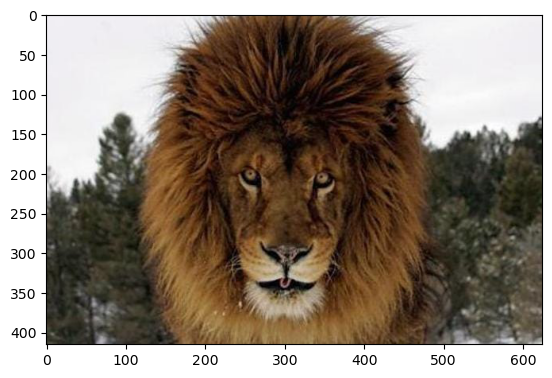

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(image)

In [4]:
#convert 3d into 2d
image_array_2d = image_array.reshape(-1, 3)

print("Original shape:", image_array.shape)
print("Shape after converting to 2D:", image_array_2d.shape)
print(image_array_2d.ndim)
print(image_array_2d)

Original shape: (415, 625, 3)
Shape after converting to 2D: (259375, 3)
2
[[241 239 244]
 [241 239 244]
 [241 239 244]
 ...
 [214 216 211]
 [218 220 215]
 [226 227 222]]


In [61]:
#  tgo initialize centroids
rgb_data = image_array_2d
# k = 3
num_centroids = 3  
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)


Randomly selected centroids:
[[75 77 64]
 [68 68 56]
 [97 64 29]]


In [6]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)

Distances to centroids:
[[554 582 632]
 [554 582 632]
 [554 582 632]
 ...
 [471 499 549]
 [483 511 561]
 [505 533 583]]


In [7]:
# Find the index of the smallest value in each row of the distances array
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[1 1 1 ... 1 1 1]


In [41]:
# to update centroids 
for i in range(70):
    updated_centroids = np.zeros_like(centroids)
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_rgb_values = rgb_data[cluster_indices]
        mean_rgb_values = np.mean(cluster_rgb_values, axis=0) 
        updated_centroids[cluster - 1] = mean_rgb_values
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[108  93  80]
 [120  99  72]
 [166 150 127]
 [199 198 197]
 [202 192 183]
 [189 187 185]
 [211 203 196]
 [133 107  75]
 [205 205 205]
 [225 225 225]
 [156 130  92]
 [146 118  81]
 [189 177 161]
 [219 218 219]
 [217 216 216]
 [212 212 212]
 [222 221 223]
 [226 227 228]
 [211 209 207]
 [177 164 147]]


In [42]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[226 227 228]
 [226 227 228]
 [226 227 228]
 ...
 [211 209 207]
 [212 212 212]
 [219 218 219]]


In [43]:
array_3d = array_d.reshape(image_array.shape)
# ensure data type
array_3d = np.uint8(array_3d)

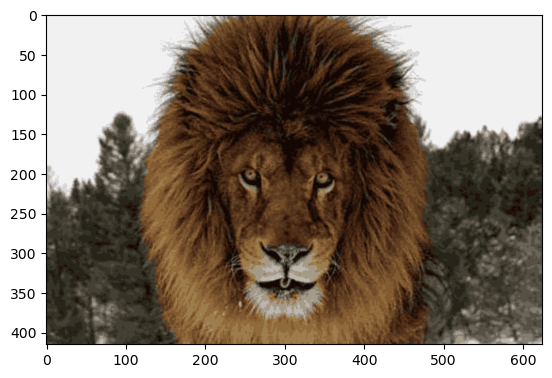

In [62]:
plt.imshow(array_3d)
plt.show()

for k = 10


In [45]:
rgb_data = image_array_2d
num_centroids = 10
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)

Randomly selected centroids:
[[ 36  33  18]
 [ 54  52  37]
 [ 38  13   8]
 [ 88  47  17]
 [ 39  37  22]
 [132 133 128]
 [242 242 244]
 [107  70  44]
 [ 73  43  33]
 [ 95  56  17]]


In [46]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)


Distances to centroids:
[[637 581 665 ... 503 575 556]
 [637 581 665 ... 503 575 556]
 [637 581 665 ... 503 575 556]
 ...
 [554 498 582 ... 420 492 473]
 [566 510 594 ... 432 504 485]
 [588 532 616 ... 454 526 507]]


In [47]:
# Find the index of the smallest value in each row of the distances array
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[6 6 6 ... 6 6 6]


In [50]:
for i in range(70):
    updated_centroids = np.zeros((10, image_array_2d.shape[1])) # Adjusted for 10 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)

Updated centroids:
[[ 57.55446095  35.14755965  18.43311883]
 [ 76.14876033  70.34404075  57.43806851]
 [ 29.1488406   13.76197789   7.22953778]
 [ 95.34112334  60.96456609  31.69970598]
 [ 55.07042211  50.41742259  38.13848573]
 [240.31918462 239.64708951 241.5194902 ]
 [181.94299407 173.44633623 161.87413293]
 [148.15483557 124.96064799  93.06959605]
 [100.28935559  94.44605995  83.03213068]
 [130.87127301  92.18913663  50.61887477]]


In [51]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[240.31918462 239.64708951 241.5194902 ]
 [240.31918462 239.64708951 241.5194902 ]
 [240.31918462 239.64708951 241.5194902 ]
 ...
 [240.31918462 239.64708951 241.5194902 ]
 [240.31918462 239.64708951 241.5194902 ]
 [240.31918462 239.64708951 241.5194902 ]]


In [52]:
array_3d = array_d.reshape(image_array.shape)
array_3d = np.uint8(array_3d)

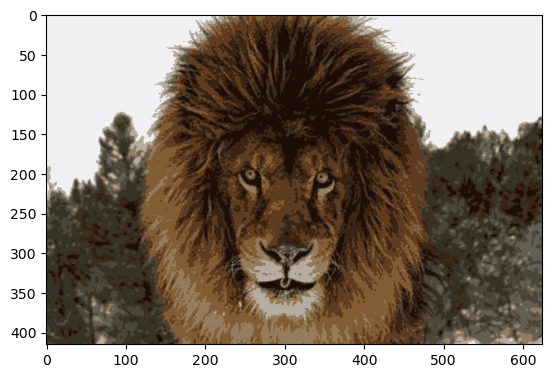

In [53]:
plt.imshow(array_3d)
plt.show()

for k=20

In [54]:
# imitialize centriods
rgb_data = image_array_2d
# k = 20
num_centroids = 20
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)

Randomly selected centroids:
[[ 88  44   7]
 [ 61  57  45]
 [ 64  38  23]
 [ 80  49  28]
 [ 51  44  36]
 [ 88  54  27]
 [ 61  42  28]
 [ 43  33  21]
 [ 84  85  80]
 [245 245 245]
 [ 58  35  17]
 [241 241 243]
 [ 71  43  32]
 [112  79  44]
 [ 50  52  38]
 [239 239 241]
 [ 57  28  12]
 [ 41  31  21]
 [166 126  75]
 [187 185 186]]


In [55]:
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)

Distances to centroids:
[[585 561 599 ... 631 357 166]
 [585 561 599 ... 631 357 166]
 [585 561 599 ... 631 357 166]
 ...
 [502 478 516 ... 548 274  83]
 [514 490 528 ... 560 286  95]
 [536 512 550 ... 582 308 117]]


In [56]:
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[16 16 16 ... 20 20 20]


In [57]:
for i in range(70):
    updated_centroids = np.zeros((20, image_array_2d.shape[1])) # Adjusted for 20 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[129.33797878  90.56788347  49.61274951]
 [105.23677155  99.30520672  88.18794977]
 [ 81.53995804  49.9357874   26.02218831]
 [111.82367402  75.10034267  40.58693385]
 [ 54.12898271  51.25761855  39.29423715]
 [145.26651265 106.81119395  60.07812664]
 [ 68.25964381  38.83899344  19.23967121]
 [ 39.92801886  37.94010637  26.89042669]
 [131.38994413 124.09452514 114.26100559]
 [ 86.06053812  80.63546338  68.10827728]
 [ 54.94666117  27.53940643  12.06661171]
 [241.69395499 241.02324242 242.97701583]
 [ 95.65172305  61.79753399  33.01726209]
 [158.57604282 125.18586194  77.98855666]
 [ 68.43254999  64.39100234  51.94813036]
 [216.9487116  215.9975223  216.36124876]
 [ 35.75518885  18.42581591   9.70363036]
 [ 20.02106613   6.16321671   3.06466386]
 [165.97680075 153.80261927 136.14499532]
 [188.59156463 182.19156463 174.07673469]]


In [58]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[241.69395499 241.02324242 242.97701583]
 [241.69395499 241.02324242 242.97701583]
 [241.69395499 241.02324242 242.97701583]
 ...
 [216.9487116  215.9975223  216.36124876]
 [216.9487116  215.9975223  216.36124876]
 [216.9487116  215.9975223  216.36124876]]


In [59]:
array_3d = array_d.reshape(image_array.shape)
#  to ensure data type
array_3d = np.uint8(array_3d)

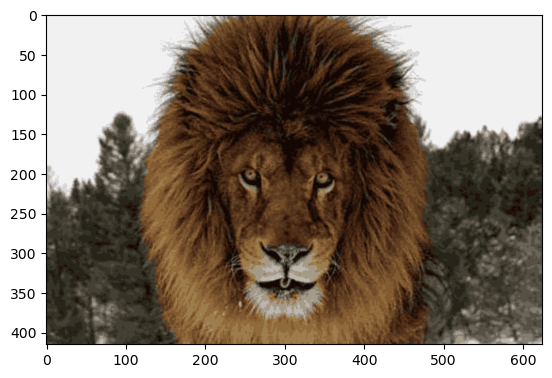

In [60]:
plt.imshow(array_3d)